# Data Science Engineering Methods and Tools

# Assignment 02: AutoML

# Background

A bank hates to lose important clients. A bank usually begins by concentrating on attracting new customers. If everything continues as planned, the business will eventually become large enough to require it to adopt a slightly more defensive approach and concentrate on keeping its current clientele. Even with the best user experience, a certain percentage of customers will always be dissatisfied and opt to quit. The issue that the bank organization must then address is how to effectively prevent these (voluntary) exits. The churn model, among others, can help in this situation.

# Abstract
This data collection includes information about a bank's clients, and the goal variable is a binary variable that indicates whether the client has remained a client or has left the firm (closed his account).

This notebook is about implementing AutoML H2O with Churn Modeling Dataset to answer the following questions:

* Is the relationship significant?
* Are any model assumptions violated?
* Is there any multicollinearity in the model?
* In the multivariate models are predictor variables independent of all the other predictor variables?
* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.
* Does the model make sense?
* Does regularization help?
* Which independent variables are significant?
* Which hyperparameters are important?



In this notebook we are analyzing the data to check the correlationship, multicollinearity, significant between variables, then use AutoML which belongs to H2O.ai to train the data and predict in different models, finally print the best model's performance.



# Information about the Dataset

Dependent Variable/Target Variable:
*   Exited: Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

Independent Variable/Predictor Variable:


*   CustomerId: Customer's unique Identification number .
*   Surname:Customer's Last name.
*   CreditScore:Credit Score of the customer.
*   Geography:The country from which the customer belong.
*   Gender:Male or Female.
*   Age: Age of the customer.
*   Tenure:Number of years customer has spent with the bank.
*   Balance: Bank balance of the customer.
*   NumOfProducts:Number of bank products the customer is utilising.
*   HasCrCard:Whether the customer has credit card or not.
*   IsActiveMember:Binary Flag for whether the customer is an active member with the bank or not.
*   EstimatedSalary:Estimated salary of the customer in Dollars.



# Initialize the H2O Cluster

In [ ]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8" 
!pip install future
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.7/177.7 MB 4.8 MB/s eta 0:00:00


# Importing all the libararies required for the assignment

In [3]:
# Importing all the libararies required
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import pearsonr

sns.set(rc={"figure.figsize": (16, 8)})

In [4]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpkbf3ejd1
  JVM stdout: /tmp/tmpkbf3ejd1/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpkbf3ejd1/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_n6ikre
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [5]:
df = h2o.import_file('https://raw.githubusercontent.com/sahu1shivani/DataScience/main/Churn_Modelling%202.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [6]:
df.describe(chunk_summary=True)

Rows:10000
Cols:14

Chunk compression summary: 
chunk_type    chunk_name                 count    count_percentage    size     size_percentage
------------  -------------------------  -------  ------------------  -------  -----------------
CBS           Binary                     32       28.5714             7.1 KB   3.1148
C1N           1-Byte Integers (w/o NAs)  32       28.5714             41.2 KB  18.105
C2            2-Byte Integers            24       21.4286             60.2 KB  26.457
C4            4-Byte Integers            8        7.14286             39.6 KB  17.4044
C4S           4-Byte Fractions           16       14.2857             79.4 KB  34.9188

Frame distribution summary: 
                 size      number_of_rows    number_of_chunks_per_column    number_of_chunks
---------------  --------  ----------------  -----------------------------  ------------------
127.0.0.1:54321  227.5 KB  10000             8                              112
mean             227.5 KB  10000             8                              112
min              227.5 KB  10000             8                              112
max              227.5 KB  10000             8                              112
stddev           0  B      0                 0                              0
total            227.5 KB  10000             8                              112

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
type,int,int,enum,int,enum,enum,int,int,real,int,int,int,real,int
mins,1.0,15565701.0,,350.0,,,18.0,0.0,0.0,1.0,0.0,0.0,11.58,0.0
mean,5000.5,15690940.5694,,650.5288,,,38.92179999999999,5.012800000000001,76485.889288,1.5302000000000004,0.7055,0.5151,100090.23988099994,0.2037
maxs,10000.0,15815690.0,,850.0,,,92.0,10.0,250898.09,4.0,1.0,1.0,199992.48,1.0
sigma,2886.8956799071675,71936.18612274881,,96.65329873613035,,,10.487806451704607,2.8921743770496837,62397.40520238596,0.5816543579989907,0.4558404644751333,0.49979692845891893,57510.492817698156,0.40276858399486093
zeros,0,0,,0,,,0,413,3617,0,2945,4849,0,7963
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1.0,15634602.0,Hargrave,619.0,France,Female,42.0,2.0,0.0,1.0,1.0,1.0,101348.88,1.0
1,2.0,15647311.0,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,3.0,15619304.0,Onio,502.0,France,Female,42.0,8.0,159660.8,3.0,1.0,0.0,113931.57,1.0


# Split the dataset into train and test set

In [7]:
train, test = df.split_frame(ratios=[0.8], seed = 1)

# Train AutoML Models

Let's configure the AutoML training parameters:
*   max_models: Maximum number of models to train
*   balance_classes: set to True to balance the class labels for tasks with imbalance data.
*   seed : Set for reproducibility


We can limit the amount of time spent on searching for the best model by limiting: 

1.   maximum number of models using max_models
2.   total time spent using max_runtime_secs
2.   time spend training any single model using max_runtime_secs_per_model

Start the training by specifying:



1.   training_frame: the dataframe that contains training data -- train in our case
2.   y: the column in the training_frame which contains the target variable -- Exited in our case




In [ ]:
aml = H2OAutoML(max_models =25,
                balance_classes=True,
		seed =1)

In [ ]:
aml.train(training_frame = train, y = 'Exited')

AutoML progress: |
00:58:46.809: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██
00:58:59.938: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██
00:59:09.838: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


00:59:23.335: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
00:59:31.892: _response param, We have d

key,value
Stacking strategy,cross_validation
Number of base models (used / total),16/42
# GBM base models (used / total),10/30
# XGBoost base models (used / total),6/9
# DRF base models (used / total),0/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


# Understanding the process of training the model using AutoML

H2O AutoML trains the following models in a sequential order:


> 
  
1.  Three pre-specified XGBoost GBM (Gradient Boosting Machine) models:
1.  A fixed grid of GLMs
2.  A default Random Forest (DRF)
1.  Five pre-specified H2O GBMs
2.  A near-default Deep Neural Net
1.  An Extremely Randomized Forest (XRT)
2.  A random grid of XGBoost GBMs
2.  A random grid of H2O GBMs
2.  A random grid of Deep Neural Nets

In addition to these models, H2O AutoML also trains:

 

1.   A stacked ensemble of all the models trained above.
2.  A "Best of Family" Stacked Ensemble that contains the best performing model for each algorithm class.

# Interpretting the above training output:

The reported metrics are for the stacked ensemble model in H2O AutoML. The metrics are reported separately for the training data and the cross-validation data.

For the training data:



> Mean Squared Error (MSE) is 0.06885, which measures the average squared difference between the predicted and actual values.

> Root Mean Squared Error (RMSE) is 0.26239, which is the square root of MSE and provides a measure of how well the model fits the data.

> Mean Absolute Error (MAE) is 0.171213, which measures the average absolute difference between the predicted and actual values.

> Root Mean Squared Log Error (RMSLE) is 0.18223, which is the RMS of the logarithmic differences between the predicted and actual values.

> R-squared (R^2) is 0.58325, which is a measure of how well the model fits the data.

The Null deviance, residual deviance, and AIC are also reported.

For the cross-validation data:



> The metrics are generally worse than for the training data, which is expected since the model was not trained on this data.


> The R^2 is 0.3758, which is still a reasonable fit but lower than for the training data.

> The other metrics are also worse, indicating that the model may be overfitting on the training data.


# Evaluation:
After the models are trained, we can compare the model performance using the leaderboard. H2O AutoML produces a leaderboard which ranks the trained model based on a predefined metric. By default it ranks models by ascending order of logloss and rmse for classification and regression task respectively.

In [ ]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20230225_05846,0.321124,0.103121,0.211261,0.225428,0.103121
StackedEnsemble_BestOfFamily_1_AutoML_1_20230225_05846,0.322068,0.103728,0.211594,0.226025,0.103728
GBM_5_AutoML_1_20230225_05846,0.323084,0.104383,0.214332,0.226319,0.104383
GBM_grid_1_AutoML_1_20230225_05846_model_2,0.323296,0.10452,0.217682,0.226489,0.10452
GBM_grid_1_AutoML_1_20230225_05846_model_21,0.32351,0.104659,0.220062,0.226715,0.104659
GBM_grid_1_AutoML_1_20230225_05846_model_16,0.323725,0.104798,0.210767,0.226808,0.104798
GBM_2_AutoML_1_20230225_05846,0.323822,0.10486,0.21699,0.227058,0.10486
GBM_grid_1_AutoML_1_20230225_05846_model_13,0.324225,0.105122,0.220288,0.227258,0.105122
GBM_1_AutoML_1_20230225_05846,0.324832,0.105516,0.216447,0.227978,0.105516
GBM_grid_1_AutoML_1_20230225_05846_model_28,0.325109,0.105696,0.224728,0.228006,0.105696


# Best Performing Model



In [ ]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20230225_05846


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  16/42
# GBM base models (used / total)      10/30
# XGBoost base models (used / total)  6/9
# DRF base models (used / total)      0/2
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.06885353664828406
RMSE: 0.26239957440568396
MAE: 0.17121344134241892
RMSLE: 0.18223738794722308
Mean Residual Deviance: 0.06885353664828406
R^2: 0.583256911326099
Null degrees of freedom: 8020


# Process of picking the best model:

The difference between the first 3 models in the leaderboard is that the first two are ensemble models that combine multiple models to make predictions, while the third is a single XGBoost model. The Stacked Ensemble models use a combination of models to make predictions and generally result in better performance compared to a single model.

The model that was probably chosen as the best model is the "StackedEnsemble_AllModels_1_AutoML_1_20230225_05846" model because it has the lowest RMSE, which is a commonly used measure of the prediction error in regression problems. However, it is important to evaluate the model based on other metrics and use cross-validation to get a more accurate estimate of the model's performance on unseen data.

# Evaluation of best Model

In [ ]:
best_model.model_performance(test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.09728070609128614
RMSE: 0.31189855096054253
MAE: 0.20314596062784934
RMSLE: 0.2212477684322298
Mean Residual Deviance: 0.09728070609128614
R^2: 0.3491218205652259
Null degrees of freedom: 1978
Residual degrees of freedom: 1962
Null deviance: 297.11088334836523
Residual deviance: 192.51851735465527
AIC: 1040.7827561737226

# Understanding the Results:

MSE (Mean Squared Error): In this case, the MSE is 0.09728, which means that the average squared difference between the predicted and actual delivery times is about 0.09728.

RMSE (Root Mean Squared Error):is the square root of MSE and is used to provide a more interpretable measure of error in the same units as the target variable. The RMSE in this case is 0.31189, which means that on average the predictions are off by about 5 minutes.

MAE (Mean Absolute Error): In this case, the MAE is 0.20314, which means that on average the predictions are off by about minutes.

RMSLE (Root Mean Squared Log Error): measures the ratio between the predicted and actual values, where the values are first log-transformed. In this case, the RMSLE is 0.22124, which means that the predicted values are off by about 22% on average.

Mean Residual Deviance: measures the variance of the residuals, which is the difference between the predicted and actual values. A lower value indicates a better fit. In this case, the mean residual deviance is 9 minutes.

R^2 (Coefficient of Determination): A value of 1 indicates a perfect fit, while a value of 0 indicates that the model does not explain any of the variance. In this case, the R^2 is 0.34912, which means that the model explains about 34% of the variance in the delivery times.

Null degrees of freedom and residual degrees of freedom: are the degrees of freedom for the null model (a model with no predictors) and the residual model, respectively. In this case, there are 1978 null degrees of freedom and 1962 residual degrees of freedom.

Null deviance and residual deviance: measure the deviance of the null model and residual model, respectively. A lower value indicates a better fit. In this case, the null deviance is 297.110 and the residual deviance is 192.518.

AIC (Akaike Information Criterion): is a measure of the relative quality of the model, taking into account the number of parameters. A lower value indicates a better fit. In this case, the AIC is 1040.7827.

# Explainability

H2O AutoML also provides insights into model’s global explainability such as variable importance, partial dependence plot, SHAP values and model correlation with just one line of code

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

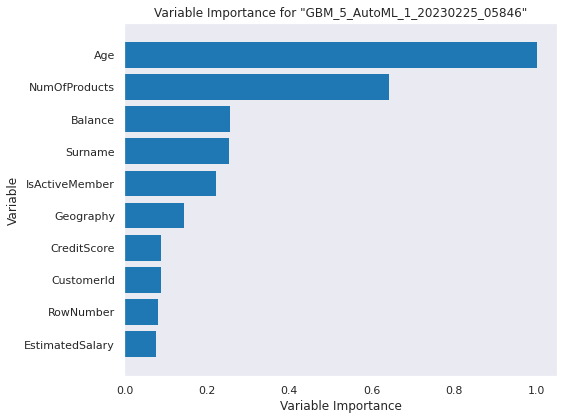

In [ ]:
explain_model = aml.explain(frame = test, figsize = (8,6),include_explanations=['varimp'])

Interpretting Feature Importance:

Age has the highest impact on the prediction outcome. This suggests that the ratings of the delivery person play a significant role in determining the duration of delivery.

NumOfProducts has the second highest impact on the prediction outcome. This suggests that the road traffic density at the time of delivery can affect the delivery time.

Balance has a moderate impact on the duration. This suggests that the condition of the vehicle used for delivery can affect the target.

Geography has lower impact on the prediction outcome. This suggests that the age of the delivery person can affect the delivery duration.

CreditScore has a lowest impact on the prediction outcome. This suggests that the weather conditions at the time of delivery can affect the delivery duration.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

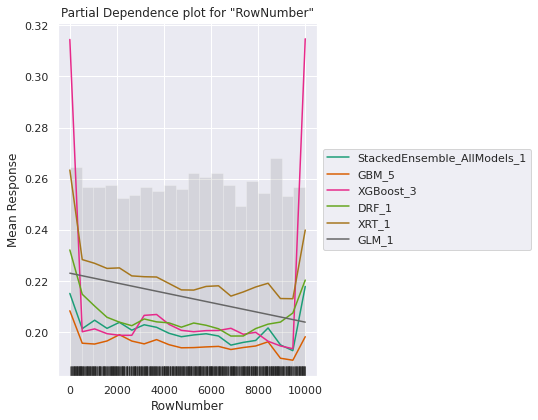

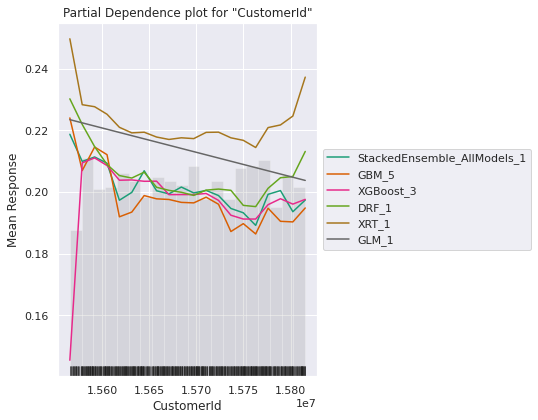

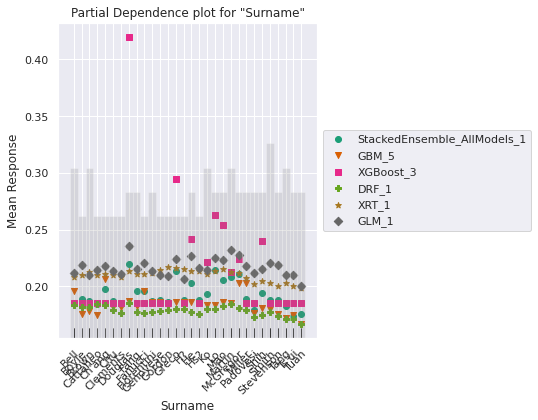

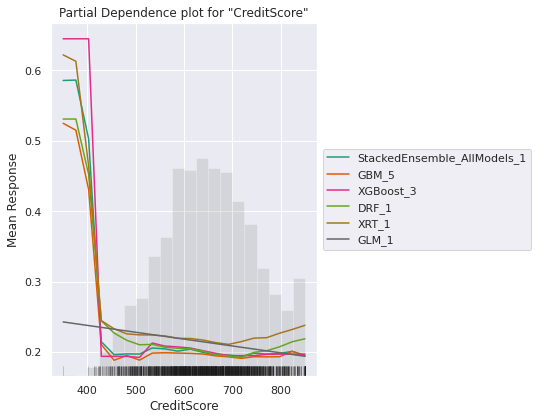

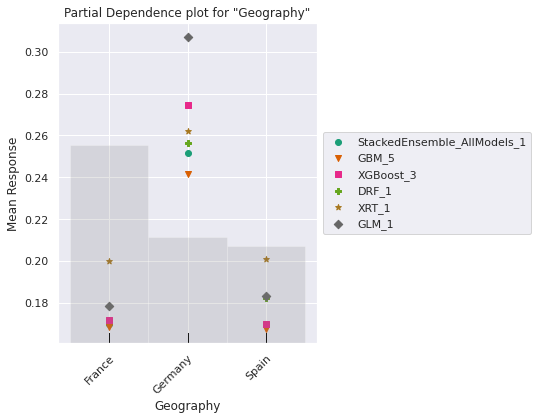

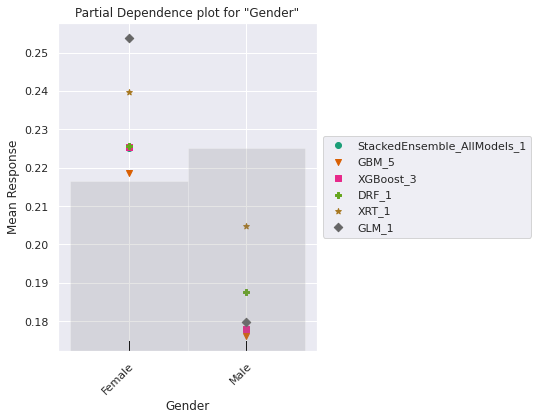

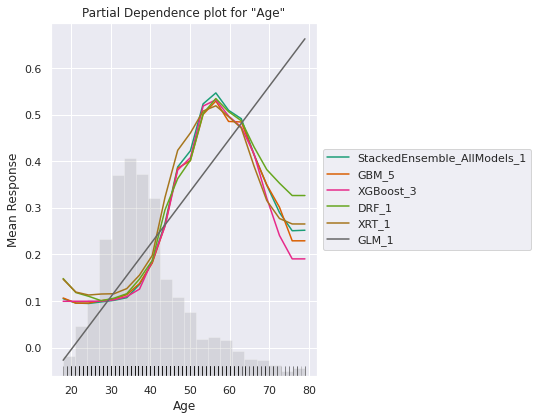

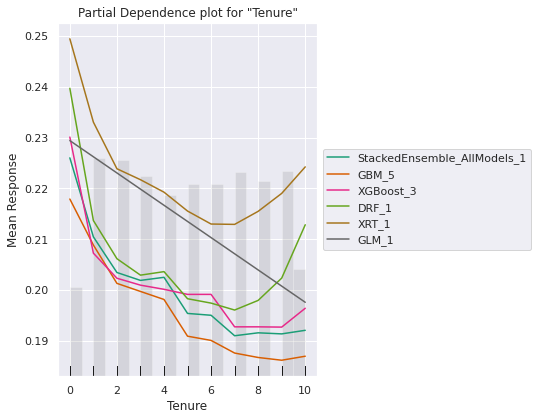

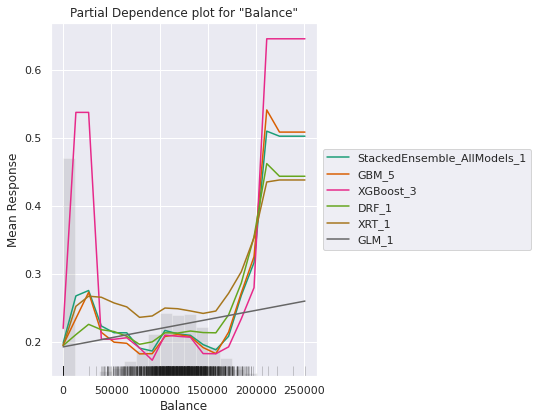

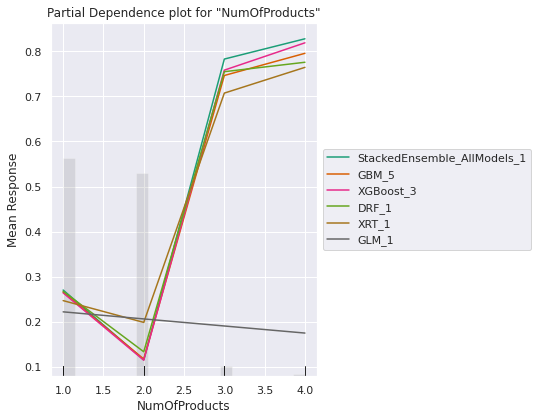

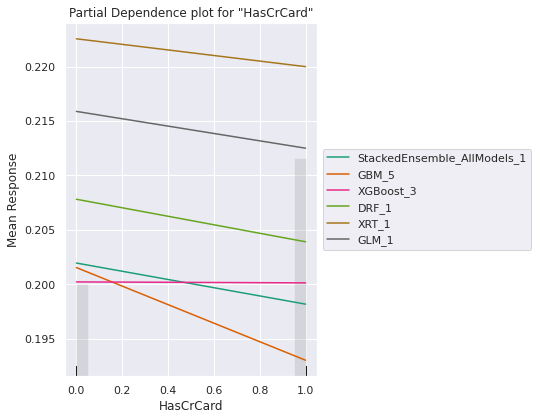

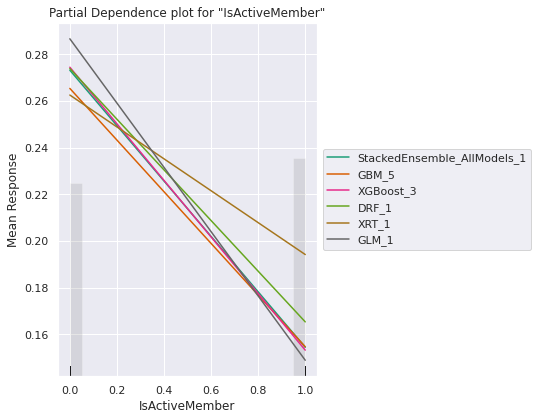

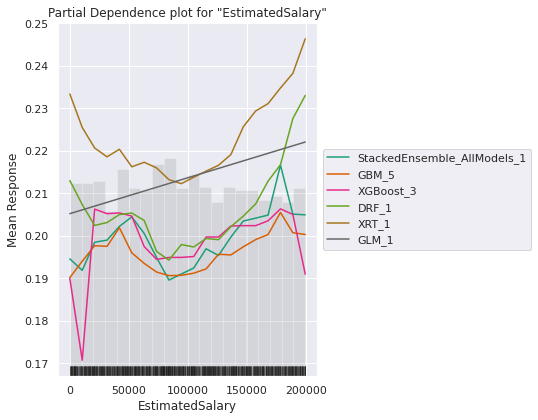

In [ ]:
explain_model = aml.explain(frame = test, figsize = (8,6),include_explanations=['pdp'])

It can be concluded from the partial dependence ploat that the Stacked Ensemble Model has a consistent response to the Mean Response(Mean Delivery Time)

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

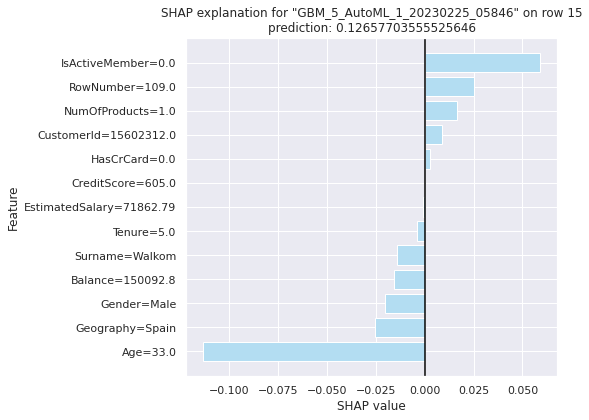

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

In [ ]:
aml.explain_row(frame = test, row_index = 15, figsize = (8,6), exclude_explanations = "leaderboard")

# Conclusion:


In this notebook, we examined how H2O AutoML can be used to:



1.   Describe a dataset
2.   Train models with minimal human inputs
3.   Make predictions on a trained model
4.   Explain the model’s predictions


# References:



1.   AI Skunks AutoML notebook references.
2.   [H2O.AI](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/index.html)
3.  [Youtube: H2o](https://www.youtube.com/watch?v=91QljBnvM7s)





# Licences:
Copyright (c) 2023 Shivani Sahu

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.